# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Фиксируем сиды рандома для того, чтобы полученный результат был воспроизводимым")

Фиксируем сиды рандома для того, чтобы полученный результат был воспроизводимым


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include='all')  

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include='all')  

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

**Ответ:**  
- mileage
- engine
- max_power
- torque
- seats

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
X_train = df_train.drop(columns=['selling_price'])
# y_train = df_train['selling_price']
X_test = df_test.drop(columns=['selling_price'])
# y_test = df_test['selling_price']

In [11]:
X_train[X_train.duplicated()].shape[0]

1159

In [12]:
X_test[X_test.duplicated()].shape[0]

69

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
X_train[X_train.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [14]:
X_test[X_test.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
200,Maruti Swift AMT VVT VXI,2019,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
221,Volkswagen Vento 1.5 Highline Plus AT 16 Alloy,2018,75000,Diesel,Individual,Automatic,First Owner,21.5 kmpl,1498 CC,108.5 bhp,250Nm@ 1500-3000rpm,5.0
235,Hyundai Grand i10 1.2 CRDi Sportz,2017,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
238,Toyota Camry 2.5 Hybrid,2016,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
253,Tata Safari Storme EX,2015,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
934,Mercedes-Benz S-Class S 350 CDI,2017,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
936,BMW X4 M Sport X xDrive20d,2019,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
949,Toyota Camry 2.5 Hybrid,2016,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
971,Maruti Ertiga SHVS ZDI Plus,2017,50000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [15]:
df_train.drop_duplicates(inplace=True, keep='first', subset = ['name',
                                                 'year',
                                                 'km_driven',
                                                 'fuel',
                                                 'seller_type',
                                                 'transmission',
                                                 'owner',
                                                 'mileage',
                                                 'engine',
                                                 'max_power',
                                                 'torque',
                                                 'seats'])

In [16]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [17]:
df_train = df_train.reset_index()
del df_train['index']

# df_test = df_test.reset_index()
# del df_test['index']

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [18]:
# mileage
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(str(x)[:-5]) if x == x else None)
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(str(x)[:-5]) if x == x else None)

# engine
df_train['engine'] = df_train['engine'].apply(lambda x: float(str(x)[:-3]) if x == x else None)
df_test['engine'] = df_test['engine'].apply(lambda x: float(str(x)[:-3]) if x == x else None)

# max_power
df_train['max_power'] = df_train['engine'].apply(lambda x: float(str(x)[:-3]) if x == x else None)
df_test['max_power'] = df_test['engine'].apply(lambda x: float(str(x)[:-3]) if x == x else None)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5654 non-null   float64
 11  torque         5653 non-null   object 
 12  seats          5654 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 593.2+ KB


Обработка **torque** (что-то я перемудрил), но работает ...

In [20]:
# чистим строки, получаем весь момент в ньютонах

def clear_torque(x):
    if len(x) == 1:
        if x[0] == 'nan':
            return None
        else:
            return float(x[0][:3])
    # ------------------
    if len(x) == 2:
        if (x[0].lower().find('nm') != -1) and (x[0].lower().find('kg') == -1):
            return float(x[0].strip()[:-2])
        elif (x[0].lower().find('nm') == -1) and (x[0].lower().find('kg') != -1):
            return float(x[0].strip()[:-3]) * 10
        else:
            return float(x[0][:3])
    # ------------------
    if len(x) == 3:
        if str(x[1]).find('kgm') != -1: 
            return float(x[0]) * 10
        else: 
            return float(x[0])

# чистим rpm
def clear_rpm(x):
    if len(x) == 1:
        return None
    # ------------------
    if len(x) >= 2:
        if len(x[1][:-3].strip()) == 4:
            return int(x[1][:-3])
        elif len(x[1].strip()) == 4:
            return int(x[1])
        elif len(x[1][:-3].strip()) > 7:
            if x[1][:-3].strip().find('/') != -1:
                # print(x[1].strip()[:4])
                return int(x[1].replace(',', '').strip()[:4])
            # print(x[1])
            return int(x[1].replace(',', '').replace('(', '').strip()[5:-3])
        else:
            # print(x[1])
            # print(x[1][:-3].replace(',', '').strip()[:4])
            return int(x[1][:-3].replace(',', '').replace('(', '').strip()[:4])

In [21]:
# train
df_temp = pd.DataFrame()
df_temp['temp'] = df_train['torque'].apply(lambda x: str(x).split('@') if str(x).find('@') != -1 
                                            else str(x).lower().split('at') if str(x).lower().find('at') != -1
                                            else str(x).split('/')) 

df_temp['temp_len'] = df_temp['temp'].apply(lambda x: len(x))

df_train['max_torque_rpm'] = df_temp['temp'].apply(lambda x: clear_rpm(x))
df_train['torque'] = df_temp['temp'].apply(lambda x: clear_torque(x))

In [22]:
# test
df_temp = pd.DataFrame()
df_temp['temp'] = df_test['torque'].apply(lambda x: str(x).split('@') if str(x).find('@') != -1 
                                            else str(x).lower().split('at') if str(x).lower().find('at') != -1
                                            else str(x).split('/')) 

df_temp['temp_len'] = df_temp['temp'].apply(lambda x: len(x))

df_test['max_torque_rpm'] = df_temp['temp'].apply(lambda x: clear_rpm(x))
df_test['torque'] = df_temp['temp'].apply(lambda x: clear_torque(x))

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [23]:
# train
df_train['mileage']        = df_train['mileage'].apply(lambda x: df_train['mileage'].median() if x != x else x )
df_train['engine']         = df_train['engine'].apply(lambda x: int(df_train['engine'].median()) if x != x else x )
df_train['max_power']      = df_train['max_power'].apply(lambda x: int(df_train['max_power'].median()) if x != x else x )
df_train['torque']         = df_train['torque'].apply(lambda x: df_train['torque'].median() if x != x else x )
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: df_train['torque'].median() if x != x else x )
df_train['seats']          = df_train['seats'].apply(lambda x: int(df_train['seats'].median()) if x != x else x )

print(df_train['mileage'].isna().sum())
print(df_train['engine'].isna().sum())
print(df_train['max_power'].isna().sum())
print(df_train['torque'].isna().sum())
print(df_train['max_torque_rpm'].isna().sum())
print(df_train['seats'].isna().sum())

0
0
0
0
0
0


In [24]:
# test
df_test['mileage']        = df_test['mileage'].apply(lambda x: df_test['mileage'].median()  if x != x else x )
df_test['engine']         = df_test['engine'].apply(lambda x: int(df_test['engine'].median())  if x != x else int(x) )
df_test['max_power']      = df_test['max_power'].apply(lambda x: int(df_test['max_power'].median())  if x != x else x )
df_test['torque']         = df_test['torque'].apply(lambda x: df_test['torque'].median()  if x != x else x )
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: df_test['max_torque_rpm'].median() if x != x else x )
df_test['seats']          = df_test['seats'].apply(lambda x: int(df_test['seats'].median())  if x != x else int(x) )

print(df_test['mileage'].isna().sum())
print(df_test['engine'].isna().sum())
print(df_test['max_power'].isna().sum())
print(df_test['torque'].isna().sum())
print(df_test['max_torque_rpm'].isna().sum())
print(df_test['seats'].isna().sum())

0
0
0
0
0
0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [25]:
print("seats это не порядковый признак, а скорее количественный признак, говорящий о типе автомобиля")

seats это не порядковый признак, а скорее количественный признак, говорящий о типе автомобиля


In [26]:
df_test['seats'].unique()

array([7, 5, 6, 4, 8, 9], dtype=int64)

In [27]:
# кастанул в ячейке выше, где заполнял пропуски
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   int64  
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   int64  
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 109.5+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

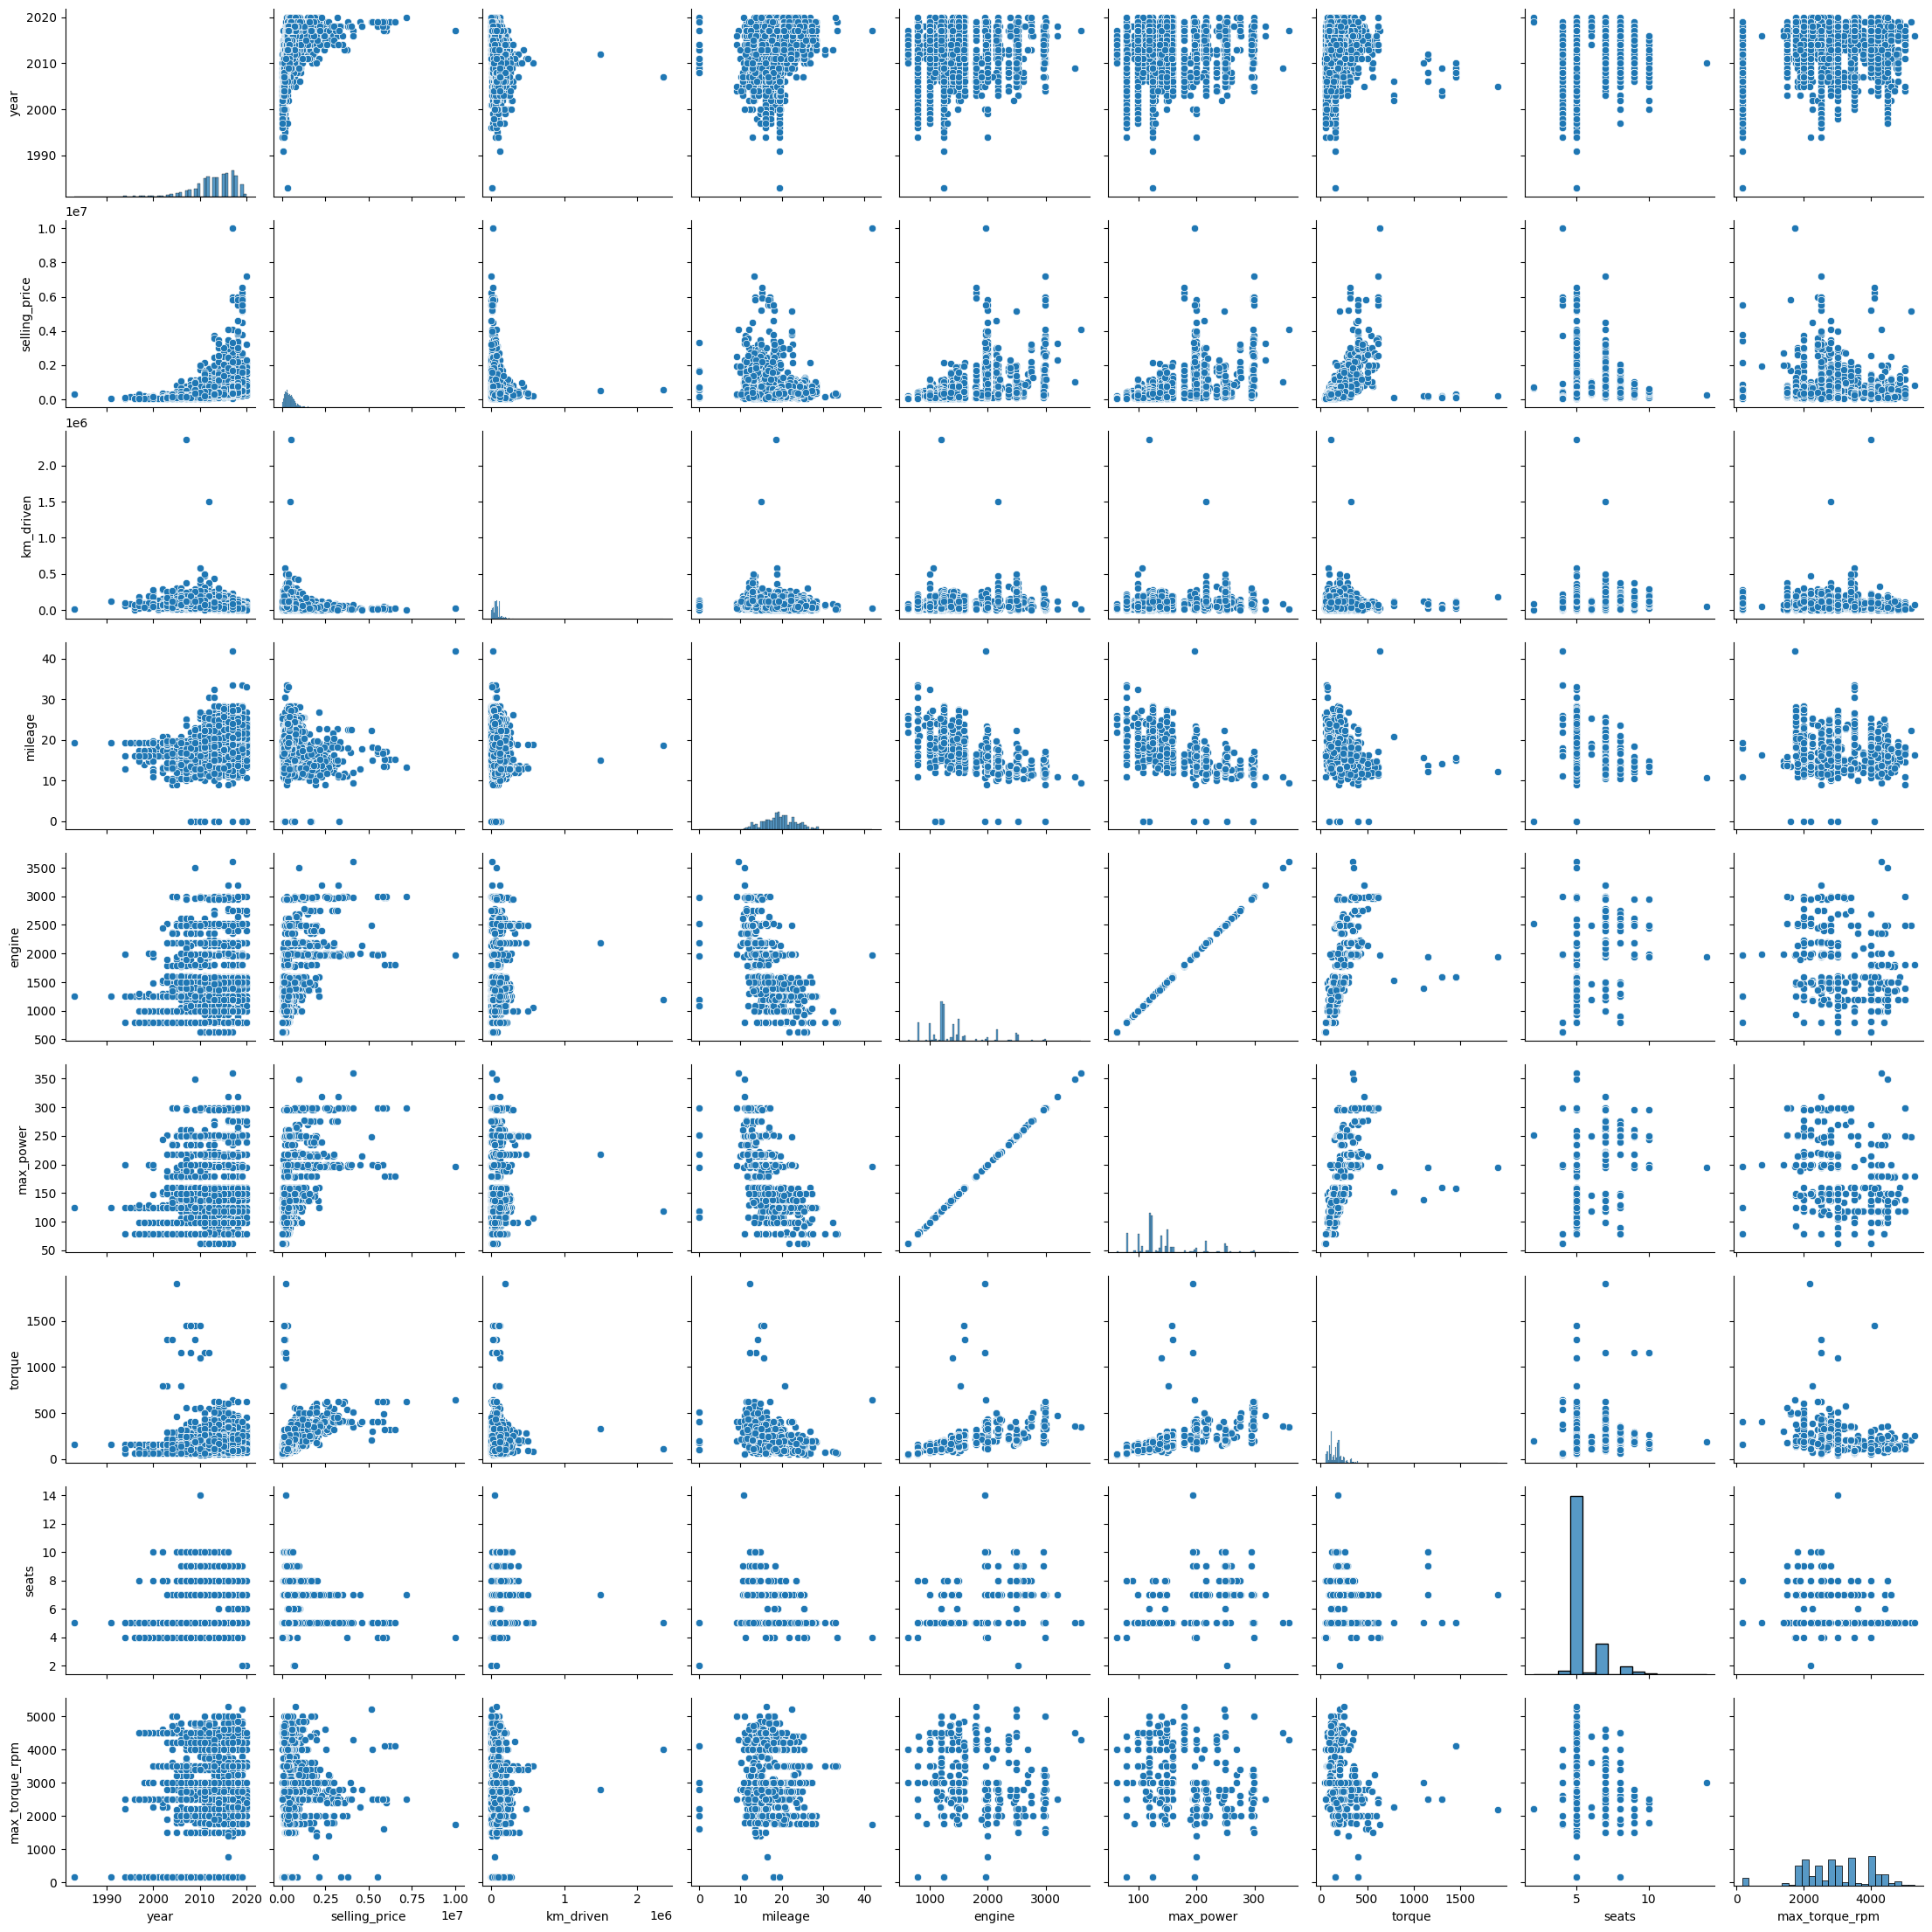

In [28]:
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [29]:
print("на некоторых факторах хорошо видно, что имеется некая зависимоть от целевой переменной, например от year")

на некоторых факторах хорошо видно, что имеется некая зависимоть от целевой переменной, например от year


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

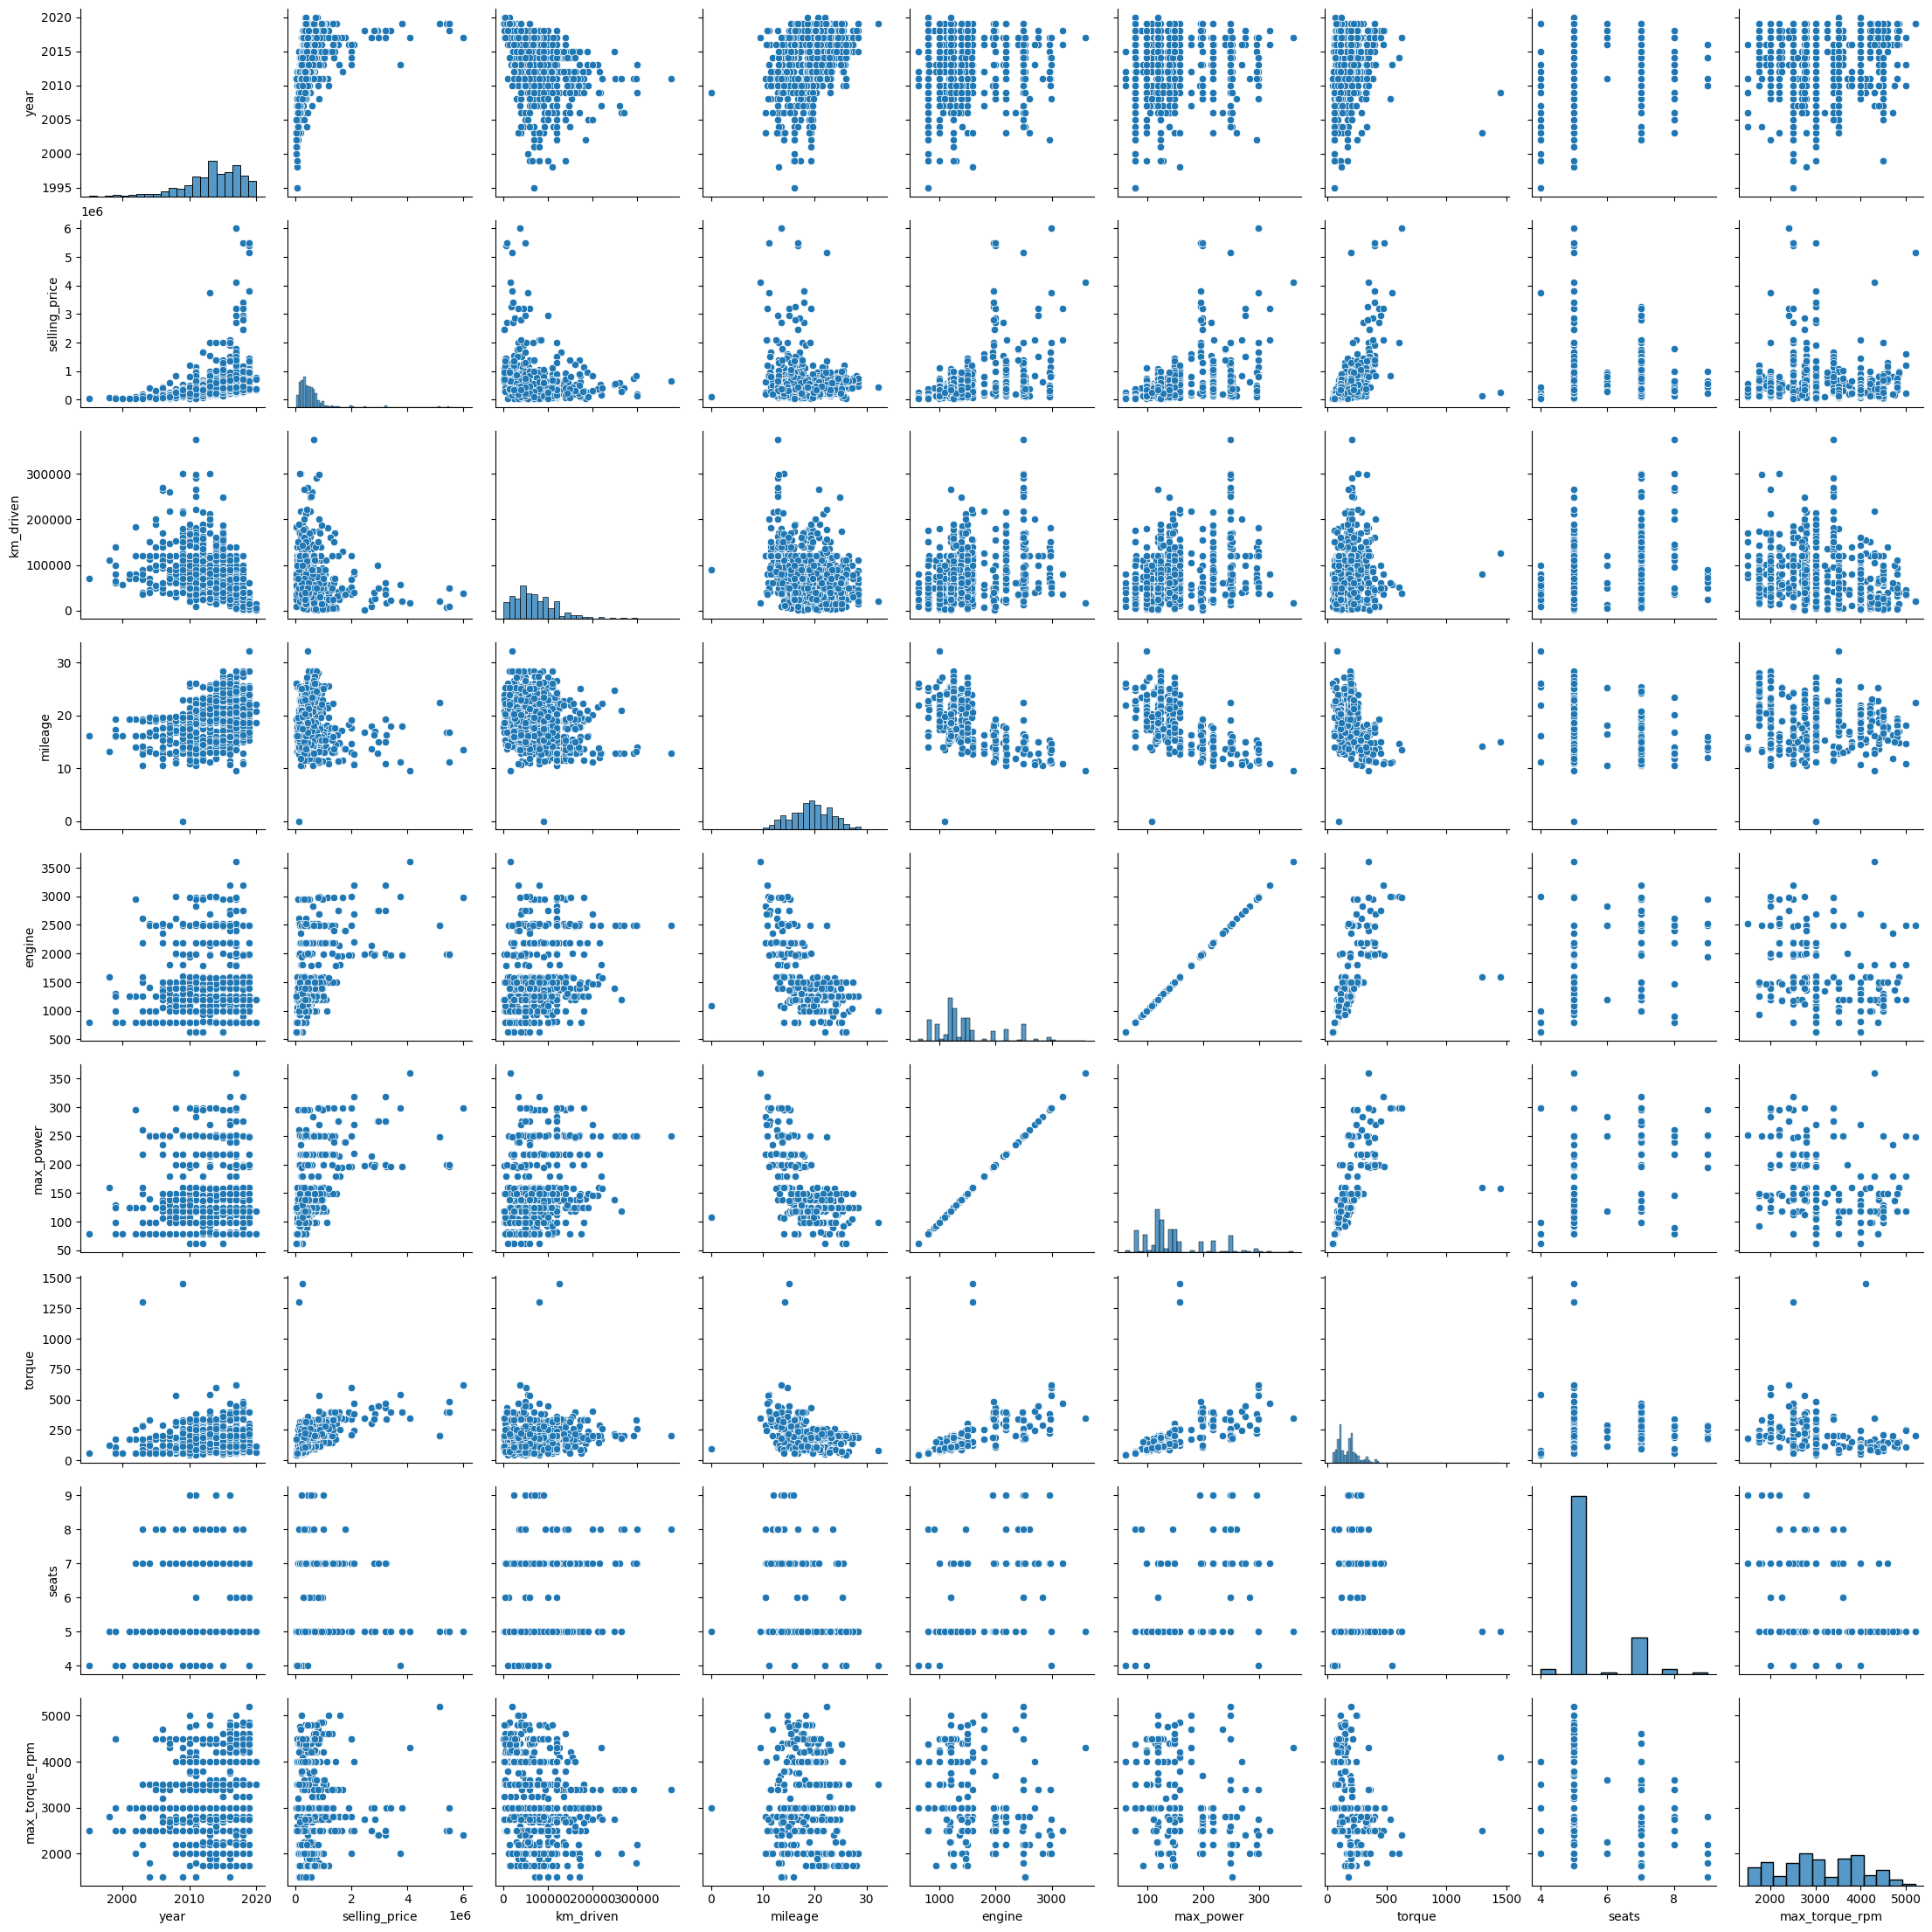

In [30]:
sns.pairplot(df_test)

In [31]:
print("На трейне и тесте данные примерно одинаково распределены ")

На трейне и тесте данные примерно одинаково распределены 


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

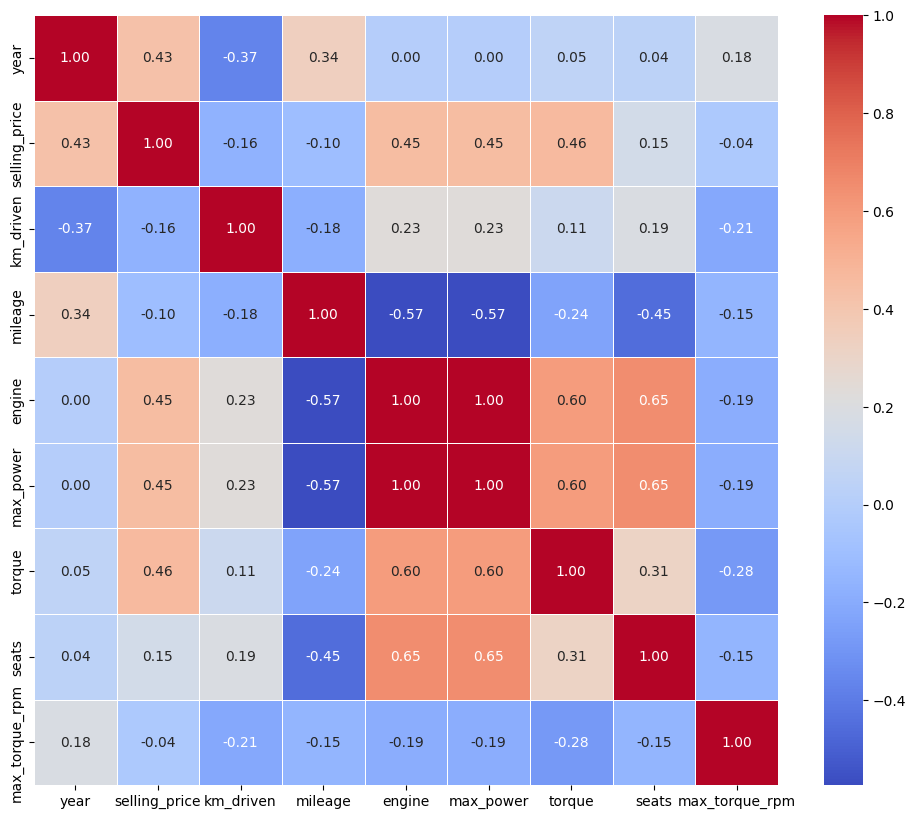

In [32]:
numeric_features = df_train.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Ответ**
- наименее скоррелированы между собой __year__ и __max power__/__engine__
- __max power__ и __engine__ имеют сильную линейную зависимость
- зависимость определённо есть, но не столь большая, чтобы утверждать, о том, что машина наименьшего года __с большей__ вероятность проехала болше километров  

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='max_power', ylabel='engine'>

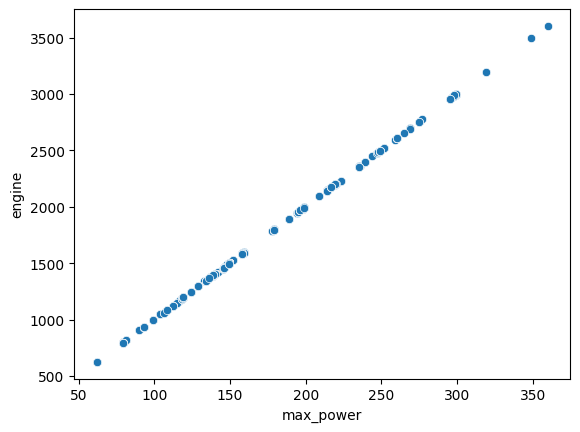

In [33]:
sns.scatterplot(x= df_train['max_power'], y=df_train['engine']) 

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

__Ответ__: Совсем забыли про категориальные фичи и о том как они зависят от таргета

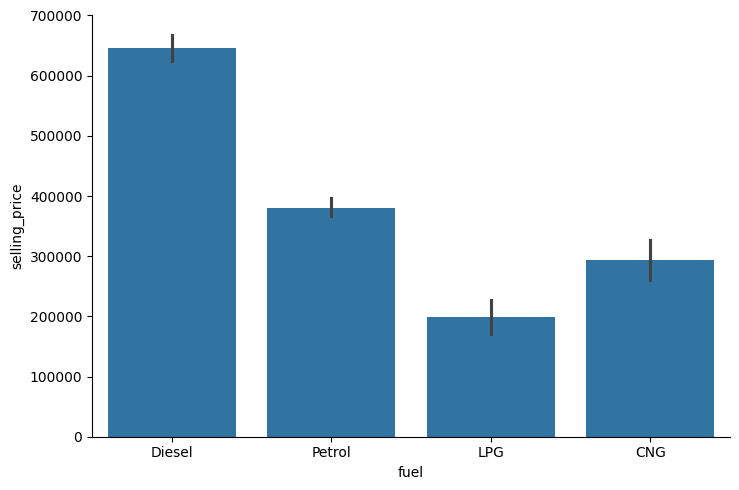

In [34]:
sns.catplot(
    x=df_train['fuel'], 
    y=df_train['selling_price'],
    kind='bar',
    height= 5,
    aspect= 1.5)

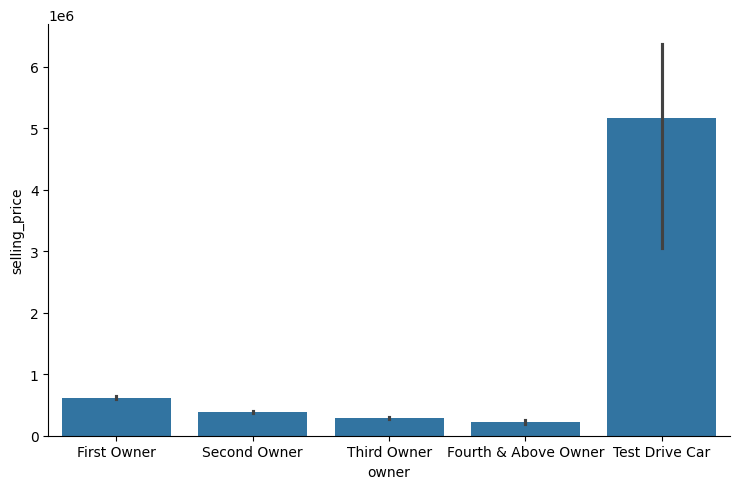

In [35]:
sns.catplot(
    x=df_train['owner'], 
    y=df_train['selling_price'],
    kind='bar',  
    height= 5,
    aspect= 1.5)

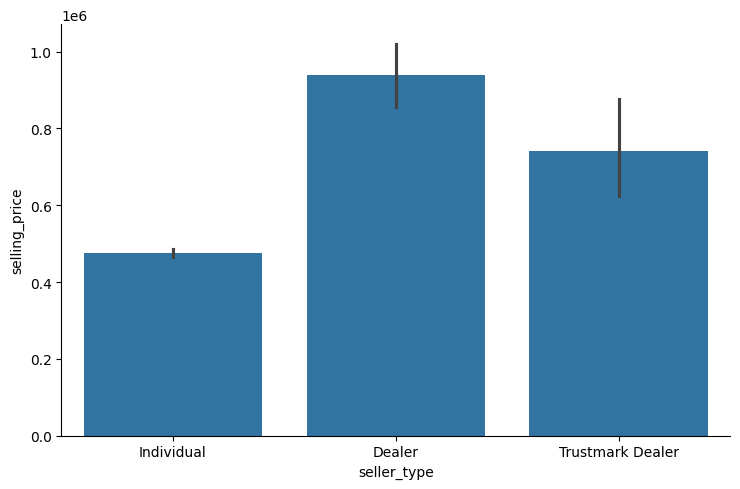

In [36]:
sns.catplot(
    x=df_train['seller_type'], 
    y=df_train['selling_price'],
    kind='bar',  
    height= 5,
    aspect= 1.5)

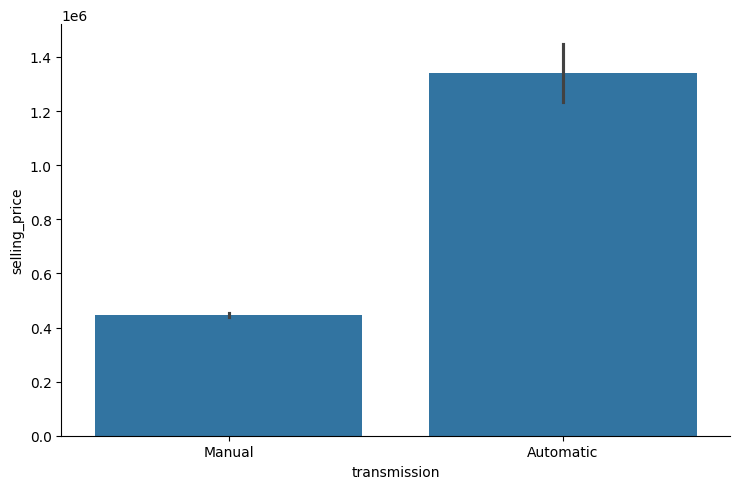

In [37]:
sns.catplot(
    x=df_train['transmission'], 
    y=df_train['selling_price'],
    kind='bar',  
    height= 5,
    aspect= 1.5)

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [38]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['selling_price', 'name', 'seller_type', 'owner', 'fuel', 'transmission'])

__ассёрт не проходит тк я сделал доп torque и max_torque_rpm__

In [39]:
X_train.shape

(5840, 8)

In [40]:
# дропну torque и max_torque_rpm чтобы сошлись результаты
del X_train['max_torque_rpm']
del X_train['torque']

In [41]:
assert X_train.shape == (5840, 6) # ассёрт не проходит тк я сделал доп torque max_torque_rpm

In [42]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['selling_price', 'name', 'seller_type', 'owner', 'fuel', 'transmission'])

__ассёрт не проходит тк я сделал доп torque и max_torque_rpm__

In [43]:
X_test.shape

(1000, 8)

In [44]:
# дропну torque и max_torque_rpm чтобы сошлись результаты
del X_test['max_torque_rpm']
del X_test['torque']

In [45]:
assert X_test.shape == (1000, 6) # ассёрт не проходит тк я сделал доп torque max_torque_rpm

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_train)
print('MSE train: ', MSE(y_train, pred))
print('R^2 train: ', r2_score(y_train, pred))

print('--------------------------------')

pred = model.predict(X_test)
print('MSE test: ', MSE(y_test, pred))
print('R^2 test: ', r2_score(y_test, pred))

MSE train:  161278990332.27533
R^2 train:  0.43734326937484524
--------------------------------
MSE test:  325552654414.07587
R^2 test:  0.4336526061192375


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [47]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_trans, y_train)

pred = model.predict(X_train_trans)
print('MSE train: ', MSE(y_train, pred))
print('R^2 train: ', r2_score(y_train, pred))

print('--------------------------------')

pred = model.predict(X_test_trans)
print('MSE test: ', MSE(y_test, pred))
print('R^2 test: ', r2_score(y_test, pred))

MSE train:  161278990332.27554
R^2 train:  0.43734326937484447
--------------------------------
MSE test:  325552654414.07513
R^2 test:  0.4336526061192387


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [48]:
model.coef_

array([  214453.73266103,   -62020.79488049,    -8687.26301725,
       -1337844.58337173,  1679321.4036974 ,  -142772.66350415])

In [49]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

__Ответ:__ max_power больше всего влияет на цену

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [50]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_trans, y_train)

pred = model.predict(X_train_trans)
print('MSE train: ', MSE(y_train, pred))
print('R^2 train: ', r2_score(y_train, pred))

print('--------------------------------')

pred = model.predict(X_test_trans)
print('MSE test: ', MSE(y_test, pred))
print('R^2 test: ', r2_score(y_test, pred))

MSE train:  161336432889.9372
R^2 train:  0.43714286855620066
--------------------------------
MSE test:  325078955897.7215
R^2 test:  0.4344766753338022


C:\Users\pledushka\Desktop\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.438e+14, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [51]:
model.coef_

array([ 214206.442686  ,  -61798.97031592,   -9609.70574502,
        306254.2749294 ,   35270.31911654, -143708.62513236])

__Ответ:__ зануления не произошло из-за того, что каждый из признаков является +- значимым, а коэффециент регулеризации не столь велик (alpha=1)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [52]:
import warnings

# Игнорирование всех предупреждений
warnings.filterwarnings("ignore")

In [53]:
%%time
from sklearn.model_selection import GridSearchCV

model = Lasso()

# Определение сетки параметров для GridSearchCV
param_grid = {'alpha': [0.0001,
                        0.001,
                        0.01,
                        0.1,
                        1,
                        10,
                        50,
                        100,
                        1000,
                        10000]}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=10)

# Обучение модели
grid_search.fit(X_train_trans, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

pred = grid_search.predict(X_train_trans)
print('MSE train: ', MSE(y_train, pred))
print('R^2 train: ', r2_score(y_train, pred))

print('--------------------------------')

pred = grid_search.predict(X_test_trans)
print('MSE test: ', MSE(y_test, pred))
print('R^2 test: ', r2_score(y_test, pred))

Best Parameters:  {'alpha': 10000}
MSE train:  162141130440.38385
R^2 train:  0.43433550665528853
--------------------------------
MSE test:  336016046941.9547
R^2 test:  0.41544997435147946
CPU times: total: 78.1 ms
Wall time: 2.33 s


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

2.33 s

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Лучший коэф:  {'alpha': 10000}

In [54]:
model = Lasso(alpha=10000)
model.fit(X_train_trans, y_train)
model.coef_

array([ 202555.4514694 ,  -54211.98400737,      -0.        ,
        274668.43005888,   40913.27610289, -113433.69431018])

Занулили __mileage__

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [55]:
%%time 

from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000],
    'l1_ratio': [0.1, 0.3, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

model = ElasticNet()

grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

pred = grid_search.predict(X_train_trans)
print('MSE train: ', MSE(y_train, pred))
print('R^2 train: ', r2_score(y_train, pred))

print('--------------------------------')

pred = grid_search.predict(X_test_trans)
print('MSE test: ', MSE(y_test, pred))
print('R^2 test: ', r2_score(y_test, pred))

Best Parameters:  {'alpha': 0.1, 'l1_ratio': 0.6}
MSE train:  1.0906424765311236e+16
R^2 train:  -38048.42781831877
--------------------------------
MSE test:  1.0925156964046692e+16
R^2 test:  -19004.939870040827
CPU times: total: 2.47 s
Wall time: 40.2 s


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

{'alpha': 0.0001, 'l1_ratio': 0.9}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [56]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,124.0,190.00,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,149.0,250.00,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,139.0,224.00,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,129.0,115.00,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,119.0,113.75,5.0,4000.0


In [57]:
X_train_cat = df_train.copy()
del X_train_cat['name']
del X_train_cat['selling_price']
del X_train_cat['torque']
del X_train_cat['max_torque_rpm']

In [58]:
assert X_train_cat.shape == (5840, 10)

In [59]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [60]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# для train
# Определение категориальных признаков
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

# Создание объекта OneHotEncoder
encoder = OneHotEncoder(drop='first')

encoder_df = pd.DataFrame(encoder.fit_transform(X_train_cat[categorical_features]).toarray(), columns=encoder.get_feature_names_out(categorical_features))

final_df_train = X_train_cat.join (encoder_df)

for i in categorical_features:
    del final_df_train[i]

final_df_train

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,2014,145500,23.40,1248.0,124.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498.0,149.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396.0,139.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298.0,129.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197.0,119.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086.0,108.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998.0,99.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,110000,18.50,1197.0,119.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493.0,149.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
X_test_cat = df_test.copy()
del X_test_cat['name']
del X_test_cat['selling_price']
del X_test_cat['torque']
del X_test_cat['max_torque_rpm']

X_test_cat.shape

(1000, 10)

In [62]:
encoder_df = pd.DataFrame(encoder.transform(X_test_cat[categorical_features]).toarray(), columns=encoder.get_feature_names_out(categorical_features))

final_df_test = X_test_cat.join(encoder_df)

for i in categorical_features:
    del final_df_test[i]

final_df_test

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,2010,168000,14.00,2498,249.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,25000,21.50,1497,149.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,218463,12.90,1799,179.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,173000,25.10,1498,149.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,70000,16.50,1172,117.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,108.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
996,2017,50000,18.60,1197,119.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2009,40000,23.00,1396,139.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2012,25000,20.36,1197,119.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
scaler = StandardScaler()

scaler.fit(final_df_train)
X_train_trans = scaler.transform(final_df_train)
X_test_trans = scaler.transform(final_df_test)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge()

# Определение сетки параметров для GridSearchCV
param_grid = {'alpha': [0.0001,
                        0.001,
                        0.01,
                        0.1,
                        1,
                        10,
                        50,
                        100,
                        1000,
                        10000]}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=10)

# Обучение модели
grid_search.fit(X_train_trans, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

pred = grid_search.predict(X_train_trans)
print('MSE train: ', MSE(y_train, pred))
print('R^2 train: ', r2_score(y_train, pred))

print('--------------------------------')

pred = grid_search.predict(X_test_trans)
print('MSE test: ', MSE(y_test, pred))
print('R^2 test: ', r2_score(y_test, pred))

Best Parameters:  {'alpha': 1000}
MSE train:  126879437481.25
R^2 train:  0.5573535689324546
--------------------------------
MSE test:  283617481612.4219
R^2 test:  0.5066050932396413


__Ответ:__ Да, качество на тесте и трейне довольно неплохо выросло 

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    data = {'true': y_true,
            'pred': list(y_pred)}
    df = pd.DataFrame(data)
    df['b_metr'] = df.apply(lambda x: 1 if x['pred'] <= x['true'] * 1.1 and x['pred'] >= x['true'] * 0.9 else 0, axis=1)
    return df['b_metr'].sum() / df.shape[0]

business_metrics(y_test, pred)

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

import pickle
import pandas as pd
from sklearn.linear_model import Ridge

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

app = FastAPI()

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:

    with open('Ridge_model.pkl', 'rb') as file:
        model = pickle.load(file)
    with open('Ridge_encoder.pkl', 'rb') as file:
        encoder = pickle.load(file)
    with open('Ridge_scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)

    df = pd.DataFrame([item.dict()])

    del df['name']
    del df['torque']
    del df['selling_price'] # дропаем таргет

    # чистим
    df['mileage'] = df['mileage'].apply(lambda x: float(str(x)[:-5]) if x == x else None)
    df['engine'] = df['engine'].apply(lambda x: float(str(x)[:-3]) if x == x else None)
    df['max_power'] = df['engine'].apply(lambda x: float(str(x)[:-3]) if x == x else None)

    # заполняем пропуски
    df['mileage'] = df['mileage'].apply(lambda x: 19.33 if x != x else x)
    df['engine'] = df['engine'].apply(lambda x: 1248 if x != x else int(x))
    df['max_power'] = df['max_power'].apply(lambda x: 124 if x != x else x)
    df['seats'] = df['seats'].apply(lambda x: 5 if x != x else int(x))


    # энкодим
    encoder_df = pd.DataFrame(encoder.transform(df[categorical_features]).toarray(),
                              columns=encoder.get_feature_names_out(categorical_features))
    df = df.join(encoder_df)

    for i in categorical_features:
        del df[i]

    # скейлим
    df = scaler.transform(df)

    # predict
    pred = model.predict(df)

    return int(pred)


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    with open('Ridge_model.pkl', 'rb') as file:
        model = pickle.load(file)
    with open('Ridge_encoder.pkl', 'rb') as file:
        encoder = pickle.load(file)
    with open('Ridge_scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)

    df = pd.DataFrame([obj.dict() for obj in items])

    del df['name']
    del df['torque']
    del df['selling_price'] # дропаем таргет

    # чистим
    df['mileage'] = df['mileage'].apply(lambda x: float(str(x)[:-5]) if x == x else None)
    df['engine'] = df['engine'].apply(lambda x: float(str(x)[:-3]) if x == x else None)
    df['max_power'] = df['engine'].apply(lambda x: float(str(x)[:-3]) if x == x else None)

    # заполняем пропуски
    df['mileage'] = df['mileage'].apply(lambda x: 19.33 if x != x else x)
    df['engine'] = df['engine'].apply(lambda x: 1248 if x != x else int(x))
    df['max_power'] = df['max_power'].apply(lambda x: 124 if x != x else x)
    df['seats'] = df['seats'].apply(lambda x: 5 if x != x else int(x))


    # энкодим
    encoder_df = pd.DataFrame(encoder.transform(df[categorical_features]).toarray(),
                              columns=encoder.get_feature_names_out(categorical_features))
    df = df.join(encoder_df)

    for i in categorical_features:
        del df[i]

    # скейлим
    df = scaler.transform(df)

    # predict
    pred = model.predict(df)

    return list(pred.astype(int))

In [ ]:
# Получаю JSON объектов для PyDantic 

df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

first_row_json = df_test.head(1).to_json(orient='records')

# Вывод JSON
print(first_row_json)

In [ ]:
# [
#     {
#     "name":"Mahindra Xylo E4 BS IV",
#     "year":2010,
#     "selling_price": 229999,
#     "km_driven":168000,
#     "fuel":"Diesel",
#     "seller_type":"Individual",
#     "transmission":"Manual",
#     "owner":"First Owner",
#     "mileage":"14.0 kmpl",
#     "engine":"2498 CC",
#     "max_power":"112 bhp",
#     "torque":"260 Nm at 1800-2200 rpm",
#     "seats":7.0
# }
# ,
# {
#     "name": "Maruti Swift Dzire VDI",
#     "year": 2014,
#     "selling_price": 450000,
#     "km_driven": 145500,
#     "fuel": "Diesel",
#     "seller_type": "Individual",
#     "transmission": "Manual",
#     "owner": "First Owner",
#     "mileage": "23.4 kmpl",
#     "engine": "1248 CC",
#     "max_power": "74 bhp",
#     "torque": "190Nm@ 2000rpm",
#     "seats": 5.0
# }
# ]

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

#### @app.post("/predict_item")

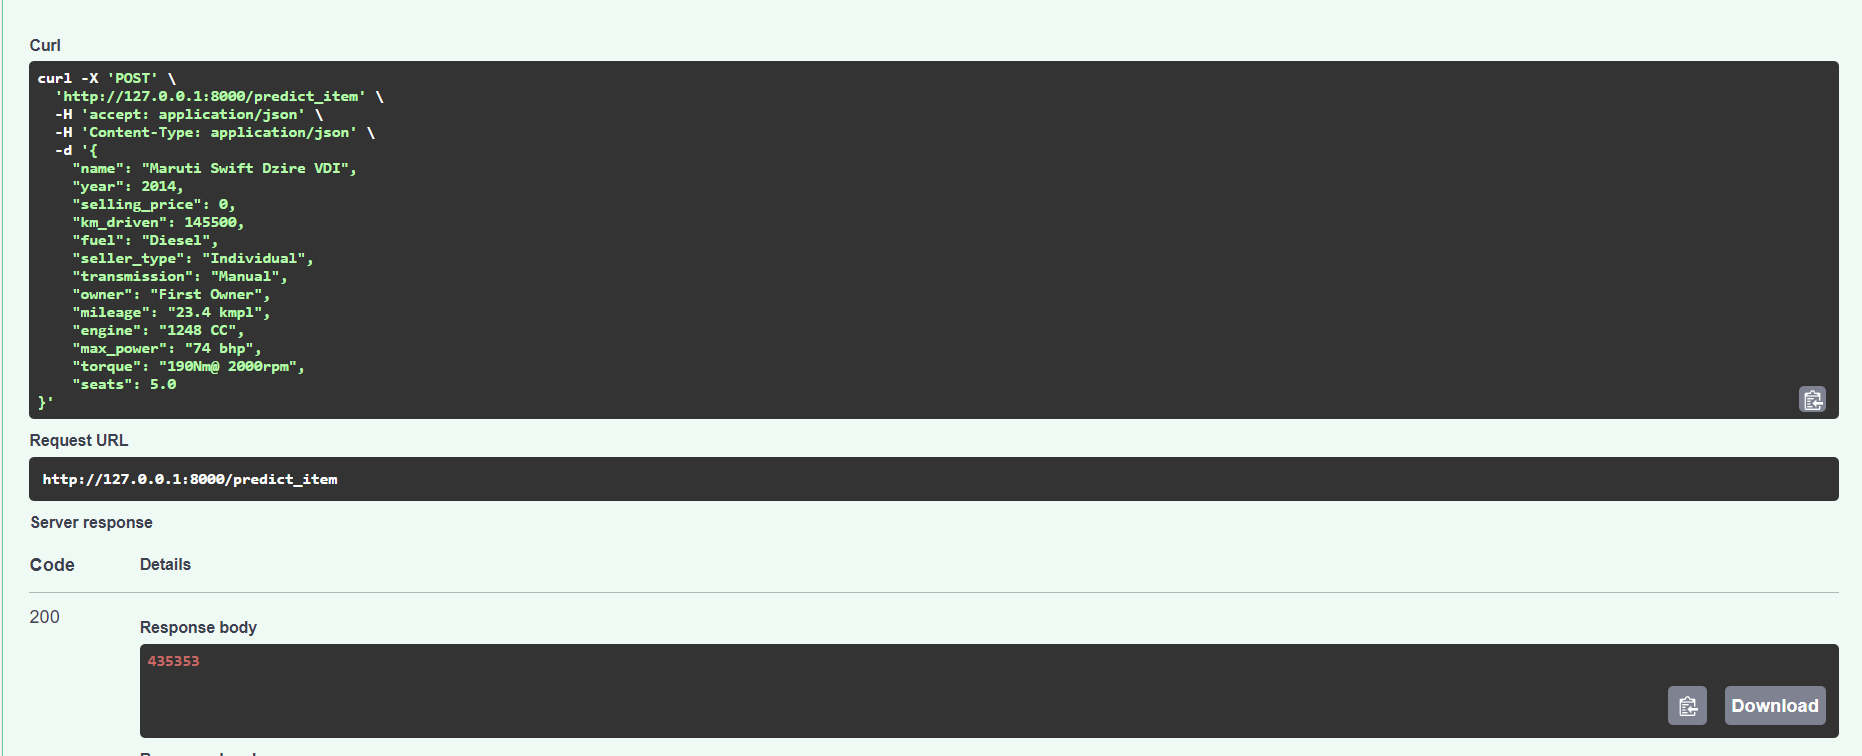

#### @app.post("/predict_items")

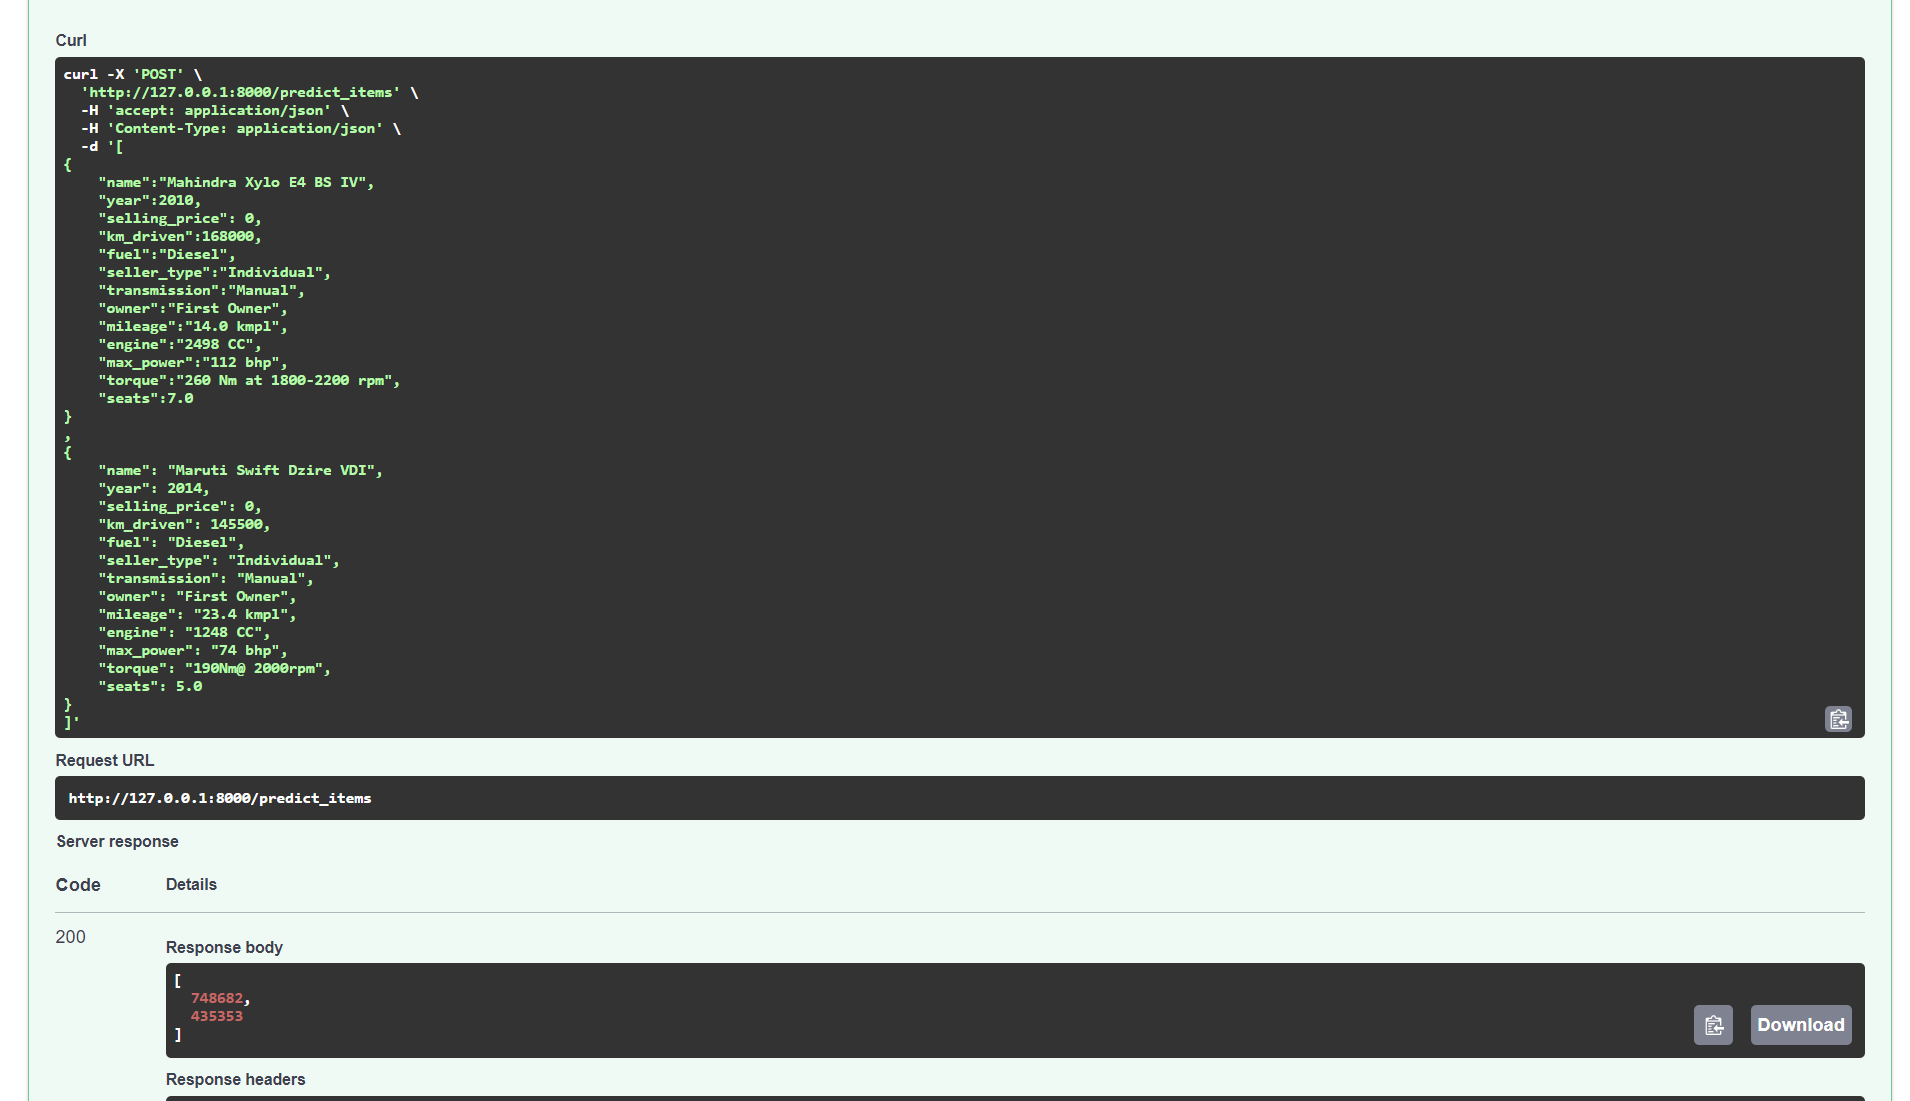

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

In [ ]:
pred.min()